## <h1><center>Machine Learning Project</center></h1>

### <center> Class of 2019/2020 </center> 



   <center> Maren Leuthner - M20190134
    <br>
    Catarina Palha - M20190156
    <br>
    Mafalda Zúquete - M20190257
    <br>
    Pedro Carvalho - M20190417</center>


### TODO - TO BE TRNSFORMED INTO INDEX

* [1. Datasets to analyse](#firstAnalyse)
    * [1.1. Drop all nulls](#tech1)
    * [1.2. Replace all the nulls](#tech2)
    * [1.2. Replace birthday_year column and drop the tents one](#tech3)
* [2. Rank features](#selection)

## 1. Introduction

On January 1st, 2020, an epidemy was originated in Albuquerque, in New Mexico state, and spread on the
following days to Santa Fe and Taos. It is estimated that the epidemy has already affected more than 1000
people at the end of February, with a mortality rate of more than 50%.

***GOAL: What are the people more likely to survive to the boolean pandemic?***


## 2. About the data

`Patient_ID` The unique identifier of the patient<br>
`Family_Case_ID` The family identification<br>
`Severity`The severity of the disease, where 1 is the lowest and 3 the highest severity<br>
`Name`The name of the patient<br>
`Birthday_year`The year of birthday of the patient<br>
`Parents_Siblings_Infected` The number of parents and/or siblings infected<br>
`Partner_Children_Infected`The number of partner and/or children infected<br>
`Medical_Expenses_Family`The medical expenses associated to try to contain the epidemy on the family<br>
`Medical_Tent` The medical tent where the patient is / was lodged<br>
`City` The original city of the patient<br>
`Deceased` Flag if the patient deceased or not with the virus (0 = No, 1 = Yes)<br>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### 1. First Look at the data 

ADDDING VARIABLES: 

`Infected_per_Family` Sum of Parents or sibilings infected and Wife/Husband or children infected<br>
`Maritial_state` 1 if it is married 0 otherwise <br>
`Gender` 1 if it is female 0 otherwise <br>


In [4]:
 #Importing the data
df = pd.read_csv('train.csv')

df['Infected_per_Family'] = df['Parents or siblings infected'] + df['Wife/Husband or children infected']

df['Maritial_Status'] = 0

df['Gender'] = 0

df['Title'] = 0

In [5]:
for i in range(0, df.shape[0]):
    
    if df.Name[i].startswith('Miss'):
        df['Maritial_Status'][i] = 0
        df['Gender'][i] = 1
        df['Title'][i] = 'Miss'
        
    elif df.Name[i].startswith('Ms.'):
        df['Maritial_Status'][i] = 'unknown'
        df['Gender'][i] = 1
        df['Title'][i] = 'Ms.'
    
    elif df.Name[i].startswith('Mrs.'):
        df['Maritial_Status'][i] = 1
        df['Gender'][i] = 1
        df['Title'][i] = 'Mrs.'
        
    elif df.Name[i].startswith('Mr.'):
        df['Maritial_Status'][i] = 1
        df['Gender'][i] = 0
        df['Title'][i] = 'Mr.'
        
    elif df.Name[i].startswith('Master'):
        df['Maritial_Status'][i] = 0
        df['Gender'][i] = 0
        df['Title'][i] = 'Master'

In [6]:
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1,0,0,1,Miss
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0,1,unknown,1,Ms.
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1,0,1,0,Mr.
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1,0,1,0,Mr.
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0,0,unknown,1,Ms.


Let's replace the unknowns on Maritial_Status variable

In [7]:
#df_ms = df[df['Title'] == 'Ms.']
#df_ms.groupby('Family_ID')['Title']

df_title = df.groupby(['Family_Case_ID', 'City'])['Title'].apply(list).reset_index().head(50).sort_values('Family_Case_ID')
df_title.head()

,Family_Case_ID,City,Title
0,345,Taos,[Mr.]
1,981,Taos,[Miss]
2,1773,Santa Fe,[Mr.]
3,1794,Santa Fe,[Mr.]
4,1816,Santa Fe,[Mr.]


In [8]:
len_list = []

for i in list(df_title['Title']):
    len_list.append(len(i))
    
df_title['fam_length_per_city'] = len_list

Let's see where fam_legth_per_city is not 1

In [9]:
df_title[df_title['fam_length_per_city'] != 1]

,Family_Case_ID,City,Title,fam_length_per_city
5,1817,Albuquerque,"[Mr., Ms.]",2
18,2098,Santa Fe,"[Miss, Mr., Ms.]",3
20,2201,Santa Fe,"[Miss, Mr., Miss]",3
23,2309,Albuquerque,"[Miss, Miss, Ms., Miss]",4
25,2396,Santa Fe,"[Mr., Ms.]",2
35,2741,Albuquerque,"[Master, Mr.]",2
43,3060,Albuquerque,"[Miss, Mr.]",2
46,3165,Santa Fe,"[Mr., Ms.]",2
47,3196,Santa Fe,"[Ms., Master]",2


First, we're going to assume that:

`Family_Case_ID 1817` The Ms. is married<br>
`Family_Case_ID 2098` The Ms. is married<br>
`Family_Case_ID 2309` The Ms. is married<br>
`Family_Case_ID 2396` The Ms. is married <br>
`Family_Case_ID 3165` The Ms. is married<br>
`Family_Case_ID 3196` The Ms. is married<br>
`All the others` The Ms. is not married<br>


In [10]:
df[(df['Family_Case_ID'] == 1817) & (df['Title'] == 'Ms.') & (df['City'] == 'Albuquerque')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
881,882,1817,1,Ms. Georgia Joann,1984.0,0,0,3798,C,Albuquerque,0,0,unknown,1,Ms.


In [11]:
df.loc[882,'Maritial_Status'] = 1

In [12]:
df[(df['Family_Case_ID'] == 2309) & (df['Title'] == 'Ms.') & (df['City'] == 'Albuquerque')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
580,581,2309,3,Ms. Melinda Rhonda,1996.0,3,0,539,NaN,Albuquerque,0,3,unknown,1,Ms.


In [13]:
df.loc[580,'Maritial_Status'] = 1

In [14]:
df[(df['Family_Case_ID'] == 2098) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
509,510,2098,2,Ms. Stephanie Myrtle,1987.0,2,1,777,NaN,Santa Fe,0,3,unknown,1,Ms.


In [15]:
df.loc[509,'Maritial_Status'] = 1

In [16]:
df[(df['Family_Case_ID'] == 2396) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
721,722,2396,3,Ms. Karla Verna,1992.0,1,1,403,NaN,Santa Fe,1,2,unknown,1,Ms.


In [17]:
df.loc[721,'Maritial_Status'] = 1

In [18]:
df[(df['Family_Case_ID'] == 3165) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
457,458,3165,3,Ms. Dianne Regina,1996.0,0,1,444,NaN,Santa Fe,0,1,unknown,1,Ms.


In [19]:
df.loc[457,'Maritial_Status'] = 1

In [20]:
df[(df['Family_Case_ID'] == 3196) & (df['Title'] == 'Ms.') & (df['City'] == 'Santa Fe')]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
141,142,3196,3,Ms. Roxanne Faye,1993.0,1,0,349,E,Santa Fe,0,1,unknown,1,Ms.


In [21]:
df.loc[141,'Maritial_Status'] = 1

In [22]:
df['Maritial_Status'] = df['Maritial_Status'].replace('unknown', 0)

In [23]:
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,NaN,Santa Fe,1,0,0,1,Miss
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,NaN,Albuquerque,0,1,0,1,Ms.
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,NaN,Santa Fe,1,0,1,0,Mr.
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,NaN,Santa Fe,1,0,1,0,Mr.
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,NaN,Santa Fe,0,0,0,1,Ms.


In [24]:
df.describe()

,Patient_ID,Family_Case_ID,Severity,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Deceased,Infected_per_Family,Maritial_Status,Gender
count,900.000000,900.000000,900.000000,723.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000
mean,450.500000,14305.827778,2.313333,1990.266943,0.380000,0.521111,895.743333,0.614444,0.901111,0.45000,0.353333
std,259.951919,25418.153900,0.834223,14.523335,0.803247,1.098385,1385.829926,0.486997,1.607892,0.49777,0.478271
min,1.000000,345.000000,1.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,225.750000,8203.000000,2.000000,1982.000000,0.000000,0.000000,221.000000,0.000000,0.000000,0.00000,0.000000
50%,450.500000,13593.500000,3.000000,1992.000000,0.000000,0.000000,405.000000,1.000000,0.000000,0.00000,0.000000
75%,675.250000,18906.500000,3.000000,1999.500000,0.000000,1.000000,861.250000,1.000000,1.000000,1.00000,1.000000
max,900.000000,742836.000000,3.000000,2019.000000,6.000000,8.000000,14345.000000,1.000000,10.000000,1.00000,1.000000


In [25]:
def unique(df):
    """To check the unique values of each columns"""
    cols = df.columns
    for name in cols:
        print('Unique values for column' , name , 'are: ' , df[name].unique())
        
#It doesn't seem to exist anything strange
#unique(df)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient_ID                         900 non-null    int64  
 1   Family_Case_ID                     900 non-null    int64  
 2   Severity                           900 non-null    int64  
 3   Name                               900 non-null    object 
 4   Birthday_year                      723 non-null    float64
 5   Parents or siblings infected       900 non-null    int64  
 6   Wife/Husband or children infected  900 non-null    int64  
 7   Medical_Expenses_Family            900 non-null    int64  
 8   Medical_Tent                       198 non-null    object 
 9   City                               898 non-null    object 
 10  Deceased                           900 non-null    int64  
 11  Age                                723 non-null    float64

In [2]:
import seaborn as sns

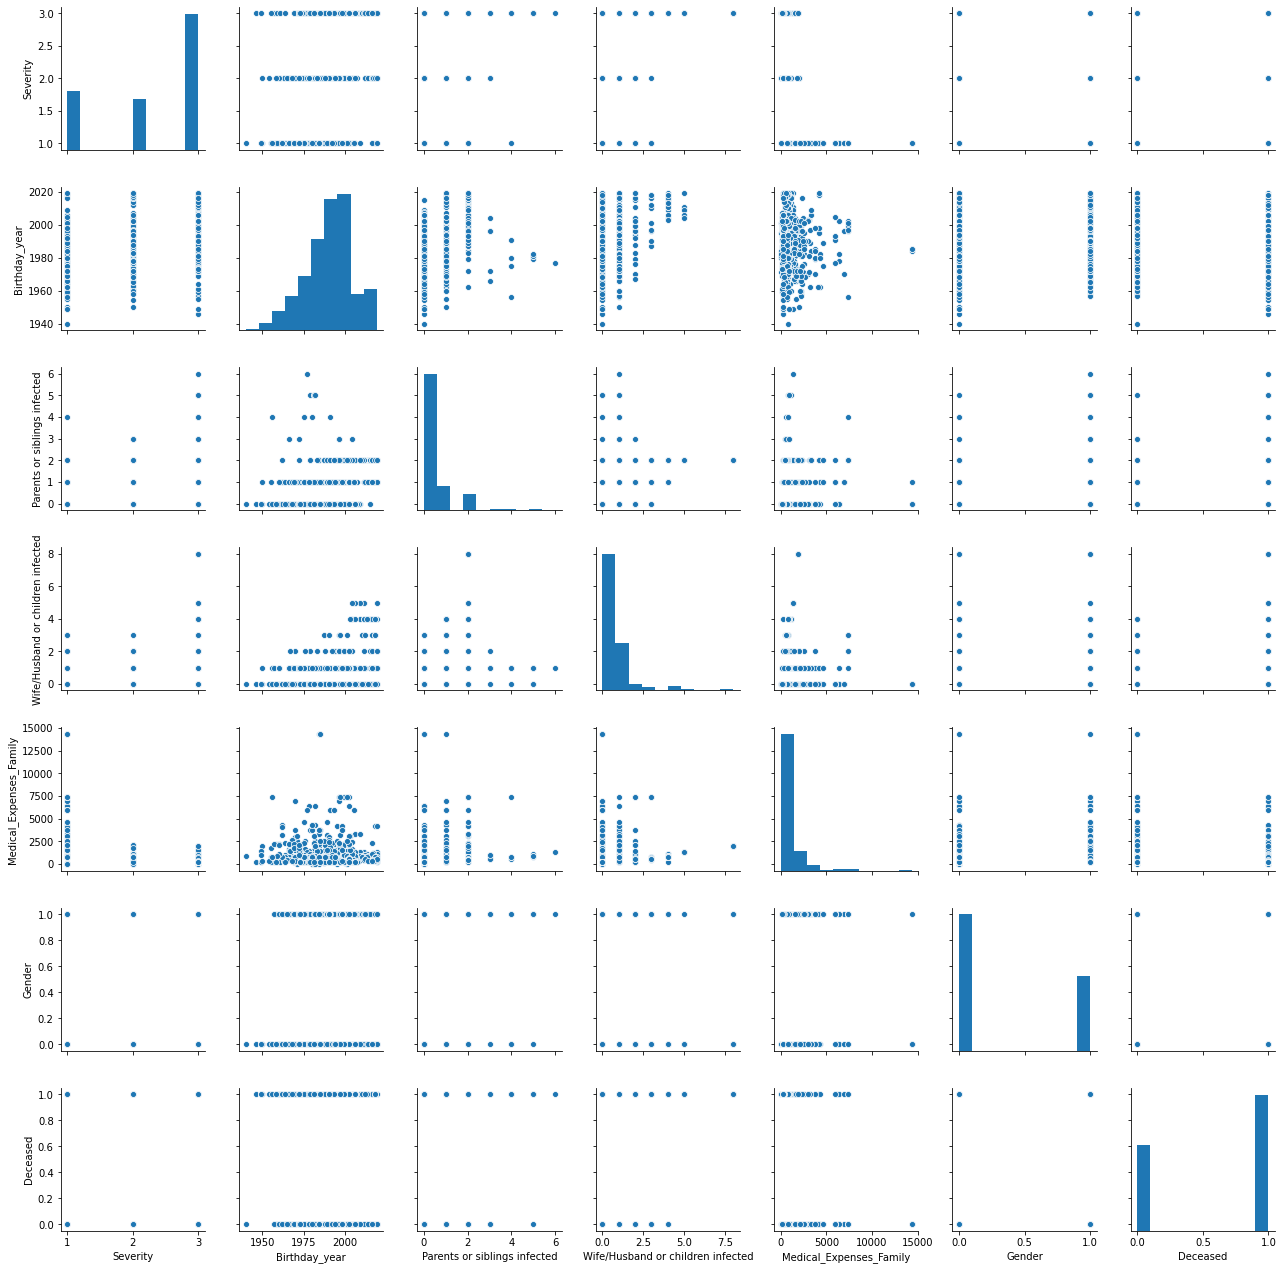

In [253]:
sns.pairplot(df[['Severity', 'Birthday_year', 'Parents or siblings infected', 'Wife/Husband or children infected', 'Medical_Expenses_Family',
                'Medical_Tent', 'City', 'Gender', 'Deceased']]) 

## 4. Replacing Nulls

There were nulls values in the columns Birthday_year, City and Medical_tent.

- **Birthday_year:** 117 (13% of the data)
- **Medical_Tent:** 702 (78% of the data)
- **City:** 2



In [26]:
df.isnull().sum()

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                        177
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
Medical_Tent                         702
City                                   2
Deceased                               0
Infected_per_Family                    0
Maritial_Status                        0
Gender                                 0
Title                                  0
dtype: int64

#### **City column replacement:**

On the dataframe with the NaN values we can see that the Family_Case_ID is the same for both patients. Therefore, we'll replace the values with the mode.

In [27]:
df_city_nan = df[df['City'].isnull()]
df_city_nan

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
49,50,23155,1,Ms. Elizabeth Teri,1958.0,0,0,2240,B,NaN,0,0,0,1,Ms.
530,531,23155,1,Ms. Tricia Kathryn,1982.0,0,0,2240,B,NaN,0,0,0,1,Ms.


In [28]:
df[df['Family_Case_ID'] == 23155] #there is only these two, therefore replace in the mode

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,Medical_Tent,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
49,50,23155,1,Ms. Elizabeth Teri,1958.0,0,0,2240,B,NaN,0,0,0,1,Ms.
530,531,23155,1,Ms. Tricia Kathryn,1982.0,0,0,2240,B,NaN,0,0,0,1,Ms.


In [29]:
mode = df['City'].mode()
mode

0    Santa Fe
dtype: object

In [30]:
df['City'] = df['City'].fillna('Santa Fe')

In [31]:
df['City'].isnull().sum()

0

Mapping the cities instead of using names:


`Albuquerque:` 1<br>
`Santa Fe: ` 2<br>
`Taos: `3<br>

In [32]:
#Mapping the cities into numbers
cities = {'Albuquerque': 1, 'Santa Fe': 2, 'Taos': 3}
  
df['City'] = [cities[item] for item in df['City']] 
print(df['City']) 

0      2
1      1
2      2
3      2
4      2
      ..
895    2
896    2
897    3
898    2
899    1
Name: City, Length: 900, dtype: int64


#### **Medical_Tent drop:**

We have 78% of the data missing here, isto is too much therefore we'll drop this column.

We're going to drop on this step the Name column as well.

In [33]:
df = df.drop(['Medical_Tent'], axis = 1)

In [34]:
df.to_csv('new_data.csv', index = False)

#### **Birthday_year column replacement:**

Although we only have 13% of the data missing in this column
We first tired to replace the birthday_year with a KNN and a Decision Tree classifier but the accuracy was very bad. Then with regression and logistic regression, bad again.
Looking at the Coronavirus reports we remmembered to set clusters of ages, for instances, instead of using the people age we're now using groups os people ages as follows:


`0 - 9 years` Group 1<br>
`10 - 19 years` Group 2<br>
`20 - 29 years` Group 3<br>
`30 - 39 years` Group 4<br>
`40 - 49 years` Group 5<br>
`50 - 59 years` Group 6<br>
`60 - 69 years` Group 7<br>
`70 - 79 years` Group 8<br>
`+ 80 years` Group 9<br>



In [34]:
df.loc[(df.Age < 10),  'AgeGroup'] = 1
df.loc[(df.Age.between(10,19)), 'AgeGroup'] = 2
df.loc[(df.Age.between(20,29)), 'AgeGroup'] = 3
df.loc[(df.Age.between(30,39)), 'AgeGroup'] = 4
df.loc[(df.Age.between(40,49)), 'AgeGroup'] = 5
df.loc[(df.Age.between(50,59)), 'AgeGroup'] = 6
df.loc[(df.Age.between(60,69)), 'AgeGroup'] = 7
df.loc[(df.Age.between(70,79)), 'AgeGroup'] = 8
df.loc[(df.Age >= 80), 'AgeGroup'] = 9

KNN

A grid search was made in order to find the best parameters to KNN algorithm and the best resultou was n_neighbors = 2 with 64% of accuracy

In [38]:
birth_not_nan = df[~(df.isna().any(axis=1))]

X = birth_not_nan.drop(['Patient_ID', 'Name', 'Family_Case_ID', 'Birthday_year', 'Age', 'AgeGroup', 'Title', 'Maritial_Status', 'Parents or siblings infected', 'Wife/Husband or children infected'], axis = 1)

y = birth_not_nan['AgeGroup']

In [274]:
from sklearn.model_selection import GridSearchCV

def GridSearch(X, y, classifier, parameters):
    
    clf = GridSearchCV(classifier, parameters)
    clf.fit(X, y)
    GridSearchCV(estimator = classifier, param_grid = parameters)
    
    #print(clf.best_estimator_)
    #print(clf.cv_results_)

    return ("Best parameters: " , clf.best_params_, "Best score: " , clf.best_score_)

    

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters_knn = {'n_neighbors': list(range(2, 12)), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3]}


GridSearch(X, y, knn, parameters_knn)

('Best parameters: ',
 {'algorithm': 'brute', 'n_neighbors': 6, 'p': 3, 'weights': 'uniform'},
 'Best score: ',
 0.3208620689655172)

Decision Tree

In [41]:
from sklearn import tree

In [42]:
dt = tree.DecisionTreeClassifier()

parameters_dt = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': list(range(2, 10)), 'random_state': list(range(1, 10))}

GridSearch(X, y, dt, parameters_dt)

('Best parameters: ',
 {'criterion': 'entropy',
  'max_depth': 4,
  'random_state': 3,
  'splitter': 'random'},
 'Best score: ',
 0.36657088122605364)

In [43]:
df.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,City,Deceased,Age,Infected_per_Family,Maritial_Status,Gender,Title,AgeGroup
0,1,4696,3,Miss Linda Betty,NaN,0,0,225,2,1,NaN,0,0,1,Miss,NaN
1,2,21436,1,Ms. Ramona Elvira,1966.0,0,1,1663,1,0,54.0,1,0,1,Ms.,6.0
2,3,7273,3,Mr. Mario Vernon,1982.0,0,0,221,2,1,38.0,0,1,0,Mr.,4.0
3,4,8226,3,Mr. Hector Joe,1997.0,0,0,220,2,1,23.0,0,1,0,Mr.,3.0
4,5,19689,3,Ms. Jennie Debra,1994.0,0,0,222,2,0,26.0,0,0,1,Ms.,3.0


Considering the target as continuos, we're going to try regression and logistic regression.

But first let's take a look into the correlations. The results are not good, it's expectable that the regression approach doesn't work.

In [12]:
import matplotlib.pyplot as plt

In [45]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased', 'Age',
       'Infected_per_Family', 'Maritial_Status', 'Gender', 'Title',
       'AgeGroup'],
      dtype='object')

In [46]:
#features = df[['Severity', 'Birthday_year', 'Parents or siblings infected', 'Wife/Husband or children infected', 'Medical_Expenses_Family', 'Deceased']]

In [47]:
corr = df.corr()

In [51]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

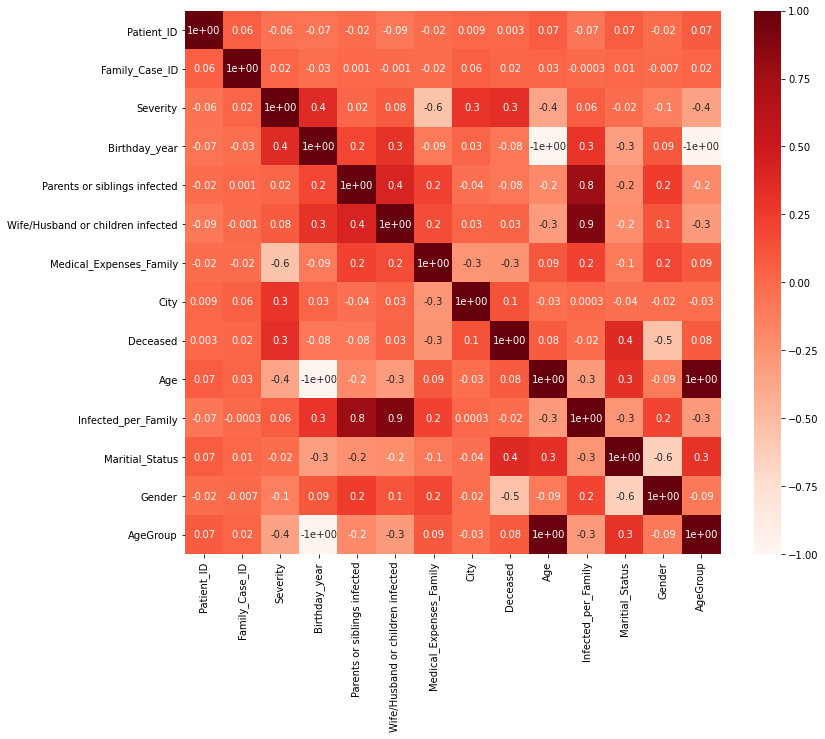

In [52]:
cor_heatmap(corr)

In [53]:
from scipy.stats import spearmanr

In [54]:
cor_spearman = df.corr(method ='spearman')

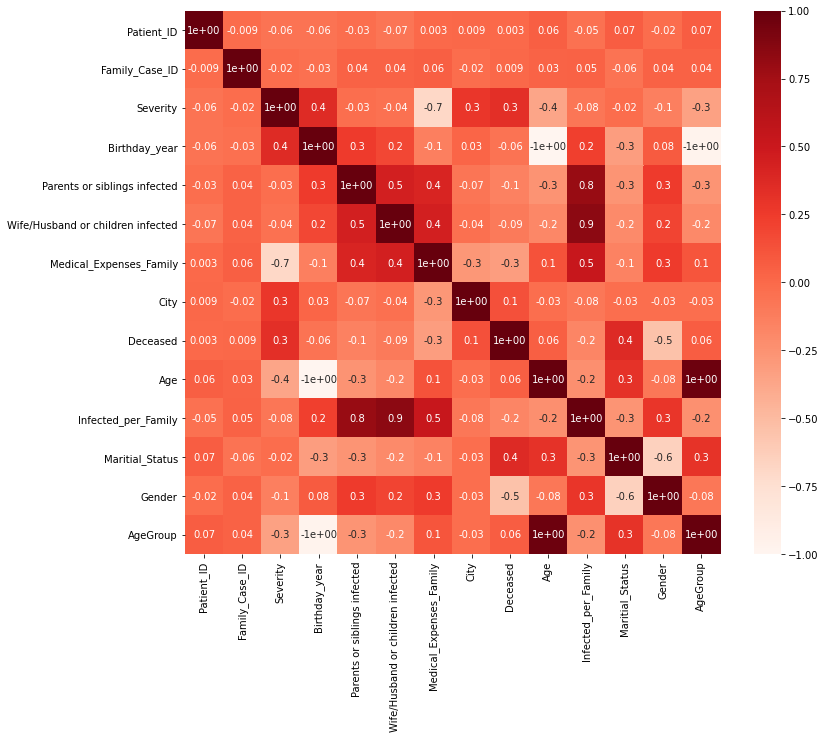

In [55]:
cor_heatmap(cor_spearman)

In [56]:
birth_not_nan = df[~(df.isna().any(axis=1))]

features = birth_not_nan[['Severity', 'Parents or siblings infected', 'Wife/Husband or children infected']]

target = birth_not_nan['Birthday_year']

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
reg = LinearRegression()

parameters_reg = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}

In [59]:
GridSearch(features, target, reg, parameters_reg)

('Best parameters: ',
 {'copy_X': True, 'fit_intercept': True, 'normalize': False},
 'Best score: ',
 0.20135035938347912)

Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log = LogisticRegression()

parameters_log = {'penalty': ['l1', 'l2', 'elasticnet', None], 'random_state': list(range(1, 10)), 'max_iter': list(range(100, 150))}

In [ ]:
GridSearch(features, target, log, parameters_log)

In [333]:
df.shape
#We have now 723 rows and 9 columns

(900, 15)

**Rules**

So, we decided to give random numbers based on Maritial_Status and Title:

The marrige average for 2019 in the USA to women was 27y and to men 29y.


`Mrs. and Ms. married` random number between 1993 and 1940<br>
`Mrs.` random number between 1991 and 1940<br>
`Master` random number between 2008 and 2019<br>
`Ms. not married` random number between 2002 and 1940<br>
`Miss if child` random number between 2008 and 2019<br>
`Miss if not child` random number between 2008 and 1940<br>

In [35]:
df = pd.read_csv('new_data.csv')

In [36]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased', 'Infected_per_Family',
       'Maritial_Status', 'Gender', 'Title'],
      dtype='object')

In [37]:
birth_nan = df[(df.isna().any(axis=1))]

birth_nan['Title'].unique() #we only have miss and master missing, and some of them are children

array(['Miss', 'Master'], dtype=object)

In [38]:
df_grouped = birth_nan.groupby(['Family_Case_ID', 'City'])['Title'].apply(list).reset_index()

In [39]:
len_list = []

for i in list(df_grouped['Title']):
    len_list.append(len(i))
    
df_grouped['fam_length_per_city'] = len_list

We're going to assume that these misses are children so we must replace with a number between 2008 and 2019.

In [40]:
df_grouped[df_grouped['fam_length_per_city'] != 1]

,Family_Case_ID,City,Title,fam_length_per_city
9,3929,3,"[Master, Master, Miss]",3
29,6152,2,"[Miss, Miss, Miss, Master]",4
30,6349,3,"[Miss, Master]",2
72,13324,3,"[Miss, Miss]",2
82,14392,1,"[Miss, Miss]",2
83,14502,2,"[Master, Miss, Miss, Master, Master, Miss, Mas...",7
86,14904,2,"[Master, Miss]",2
99,16621,1,"[Master, Master]",2
109,17504,2,"[Master, Miss]",2
110,17598,2,"[Master, Master, Master]",3


In [41]:
import random

In [42]:
df[(df['Title'] == 'Master') & (df['Birthday_year'].isna())]

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents or siblings infected,Wife/Husband or children infected,Medical_Expenses_Family,City,Deceased,Infected_per_Family,Maritial_Status,Gender,Title
5,6,17598,2,Master Terrell Bob,NaN,0,0,0,2,1,0,0,0,Master
15,16,19174,3,Master Alfredo Marty,NaN,0,0,211,2,1,0,0,0,Master
26,27,4274,2,Master Elias Wilson,NaN,0,0,0,2,1,0,0,0,Master
27,28,22832,3,Master Jeremiah Billy,NaN,0,0,217,3,1,0,0,0,Master
32,33,19631,3,Master Matthew Guillermo,NaN,0,0,405,1,1,0,0,0,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,856,13946,1,Master Glenn Darrell,NaN,0,0,994,2,0,0,0,0,Master
869,870,3539,3,Master Duane Dallas,NaN,0,0,423,2,1,0,0,0,Master
870,871,4275,3,Master Louis Elias,NaN,0,0,202,1,1,0,0,0,Master
871,872,11524,1,Master Bryan Vincent,NaN,0,0,0,2,1,0,0,0,Master


In [43]:
loop_list_master = list(df[(df['Title'] == 'Master') & (df['Birthday_year'].isna())].index)

In [44]:
for i in loop_list_master:
    
    #Insures that every row has different random numbers.
    
    df['Birthday_year'][i] = random.randint(2008,2019)

In [45]:
print(df['Birthday_year'][5])
print(df['Birthday_year'][15])
print(df['Birthday_year'][26])

2016.0
2018.0
2016.0


In [46]:
df['Birthday_year'].isnull().sum()

53

In [47]:
df.isnull().sum()

Patient_ID                            0
Family_Case_ID                        0
Severity                              0
Name                                  0
Birthday_year                        53
Parents or siblings infected          0
Wife/Husband or children infected     0
Medical_Expenses_Family               0
City                                  0
Deceased                              0
Infected_per_Family                   0
Maritial_Status                       0
Gender                                0
Title                                 0
dtype: int64

In [48]:
df.shape

(900, 14)

In [49]:
df = pd.merge(df, df_grouped, on = ['Family_Case_ID', 'City'], how = 'left')
df.shape

(900, 16)

In [50]:
loop_list_miss_children = list(df[(df['fam_length_per_city'] != 1) & (df['Birthday_year'].isna())].index)

In [51]:
for i in loop_list_miss_children:
    
    #Insures that every row has different random numbers.
    
    df['Birthday_year'][i] = random.randint(2008,2019)

In [52]:
df['Birthday_year'].isnull().sum()

38

In [53]:
loop_list_miss_adult = list(df[(df['Title_x'] == 'Miss') & (df['Birthday_year'].isna())].index)

In [54]:
for i in loop_list_miss_adult:
    
    #Insures that every row has different random numbers.
    
    df['Birthday_year'][i] = random.randint(1940,2008)

In [55]:
df.isnull().sum()

Patient_ID                             0
Family_Case_ID                         0
Severity                               0
Name                                   0
Birthday_year                          0
Parents or siblings infected           0
Wife/Husband or children infected      0
Medical_Expenses_Family                0
City                                   0
Deceased                               0
Infected_per_Family                    0
Maritial_Status                        0
Gender                                 0
Title_x                                0
Title_y                              698
fam_length_per_city                  698
dtype: int64

In [56]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased', 'Infected_per_Family',
       'Maritial_Status', 'Gender', 'Title_x', 'Title_y',
       'fam_length_per_city'],
      dtype='object')

In [58]:
df = df.drop(['Title_y', 'fam_length_per_city'], axis = 1)

In [59]:
df = df.rename(columns={"City_x": "City", "Title_x": "Title"})

In [60]:
df.shape

(900, 14)

In [61]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased', 'Infected_per_Family',
       'Maritial_Status', 'Gender', 'Title'],
      dtype='object')

## 5. Removing Outliers

In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [68]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased', 'Infected_per_Family',
       'Maritial_Status', 'Gender', 'Title'],
      dtype='object')

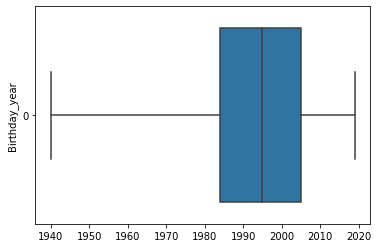

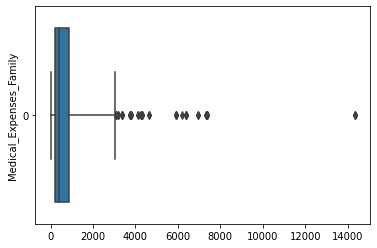

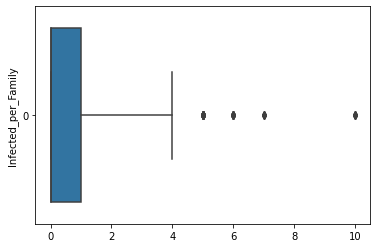

In [69]:
col = ['Birthday_year', 'Medical_Expenses_Family', 'Infected_per_Family']

for col in col:

    sns.boxplot(data = df[col], orient = "h", whis = 3.5)
    plt.ylabel(col)
    plt.show()

We have outliers in: Family_Case_ID, Parents or siblings infected, Wife/Husband or children infected and Medical_Expenses_Family

In [70]:
def zscore(series):
    """Returns the Z score"""
    return (series-series.mean()) / series.std()

In [72]:
out_1 = zscore(df['Medical_Expenses_Family'])
out_2 = zscore(df['Infected_per_Family'])

In [73]:
df_out = pd.DataFrame({'Medical_Expenses_Family': out_1, 'Infected_per_Family': out_2
                      })

In [74]:
df_out.shape #Correct

(900, 2)

In [76]:
df_out_1 = df_out[(df_out['Medical_Expenses_Family'] > 4) | (df_out['Medical_Expenses_Family'] < -4)]
print(df_out_1.shape)
#20 outliers with threshold = 3
#11 outliers with threshold = 4
list_1 = list(df_out_1.index)

(11, 2)


In [79]:
df_out_2 = df_out[(df_out['Infected_per_Family'] > 4) | (df_out['Infected_per_Family'] < -4)]
print(df_out_2.shape)
#25 outliers with threshold = 3
#7 outliers with threshold = 4
list_2 = list(df_out_2.index)

(7, 2)


In [80]:
#all outliers together
list_all = list_1 + list_2

list_to_remove = []

for i in list_all:
  if i not in list_to_remove:
    list_to_remove.append(i)

In [81]:
for i in list_to_remove:
    df = df.drop([df.index[i]])

In [82]:
df = df.reset_index(drop = True)

In [83]:
df.shape

(882, 14)

In [85]:
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased', 'Infected_per_Family',
       'Maritial_Status', 'Gender', 'Title'],
      dtype='object')

We lost 2% of the data, not bad.

In [86]:
df.to_csv('clean_data.csv', index = False)

## 6. Feature Selection

In [224]:
df = pd.read_csv('clean_data.csv')
df.columns

Index(['Patient_ID', 'Family_Case_ID', 'Severity', 'Name', 'Birthday_year',
       'Parents or siblings infected', 'Wife/Husband or children infected',
       'Medical_Expenses_Family', 'City', 'Deceased', 'Infected_per_Family',
       'Maritial_Status', 'Gender', 'Title'],
      dtype='object')

Let's add a variable:

`is_young: `0 if the age is lower than 60, 1 otherwise<br>

In [226]:
df['Age'] = 2020 - df['Birthday_year']

df['Is_young'] = 0

In [227]:
for i in range(0, df.shape[0]):
    
    if df['Age'][i] > 60:
        df['Is_young'][i] = 1
    
    else:
        df['Is_young'][i] = 0

`FEATURES`categorical and numerical<br>

`TARGET` categorical<br>

Once we have categorical and numerical input we need to divide the features in order to decide which numerical and categorical feature contributes the most:

1. Numerical Input/ Categorical Output: ANOVA and Kendall's

2. Categorical Input/ Categorical Output: Chi-Squared and Mutual Information

Dividing the features into Numerical and Categorical


In [233]:
df_numerical = df[['Birthday_year', 'Infected_per_Family', 'Medical_Expenses_Family', 'Parents or siblings infected', 'Wife/Husband or children infected']]

df_categorical = df[['Severity', 'City', 'Maritial_Status', 'Gender', 'Is_young']]

target = df['Deceased']

#### 1. ANOVA


`INPUT VARIABLES`: Numerical <br>
`OUPUT VARIABLE`: categorical <br>

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

Selecting the features with the best ANOVA F-Values

In [97]:
X_numerical = df_numerical.to_numpy()

y_target = target.to_numpy()

In [109]:
# Create a SelectKBest object to select features with two best ANOVA F-Values
model = SelectKBest(f_classif, k = 'all')

# Apply the SelectKBest object to the features and target
best = model.fit_transform(X_numerical, y_target)
best

array([[2.007e+03, 0.000e+00, 2.250e+02, 0.000e+00, 0.000e+00],
       [1.966e+03, 1.000e+00, 1.663e+03, 0.000e+00, 1.000e+00],
       [1.982e+03, 0.000e+00, 2.210e+02, 0.000e+00, 0.000e+00],
       ...,
       [1.990e+03, 0.000e+00, 2.140e+02, 0.000e+00, 0.000e+00],
       [1.994e+03, 2.000e+00, 8.120e+02, 1.000e+00, 1.000e+00],
       [2.002e+03, 0.000e+00, 2.020e+02, 0.000e+00, 0.000e+00]])

In [110]:
model.pvalues_

array([6.26062761e-02, 6.67294265e-01, 2.40287772e-14, 2.02721664e-02,
       2.86538592e-01])

In [117]:
scores = model.scores_
scores

array([ 3.4757758 ,  0.18490787, 60.17191729,  5.40791373,  1.1371936 ])

In [118]:
X_indices = np.arange(X_numerical.shape[-1])

<BarContainer object of 5 artists>

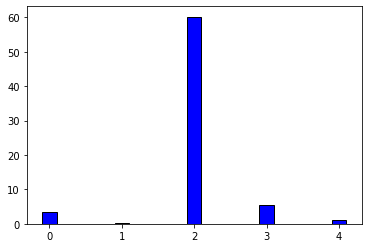

In [119]:
plt.bar(X_indices, scores, width = .2, color = 'blue', edgecolor = 'black')
#It seems that the most important feature is Medical_Expenses and parents_and_siblings_infected.

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [262]:
#no of features
nof_list=np.arange(1, 6) 

high_score=0

#Variable to store the optimum features
nof=0           

score_list =[]

models = [LogisticRegression(), MultinomialNB(), DecisionTreeClassifier(), RandomForestClassifier()]

m = []

for n in range(len(nof_list)):
    for model in models:
    
        X_train, X_test, y_train, y_test = train_test_split(X_numerical,y_target, test_size = 0.3, random_state = 0)
        
        rfe = RFE(model,nof_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe, y_train)

        score = model.score(X_test_rfe, y_test)
        score_list.append(score)
        print(score)
        m.append(model)

        if(score > high_score):
            high_score = score
            nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print("Using: put decision tree")

0.5660377358490566
0.5735849056603773
0.6716981132075471
0.6528301886792452
0.5811320754716981
0.5811320754716981
0.630188679245283
0.6226415094339622
0.5811320754716981
0.5811320754716981
0.6075471698113207
0.6792452830188679
0.660377358490566
0.6226415094339622
0.6264150943396226
0.6566037735849056
0.660377358490566
0.6528301886792452
0.6452830188679245
0.6490566037735849
Optimum number of features: 3
Score with 3 features: 0.679245
Using: put decision tree


The model tell us to choose Birthday_year, infected_per_Family and Meadical Expenses.

In [264]:
dt = RandomForestClassifier()

rfe = RFE(dt, 3)
model = rfe.fit(X_numerical, y_target)
print("Num Features: %s" % (model.n_features_))
print("Selected Features: %s" % (model.support_))
print("Feature Ranking: %s" % (model.ranking_))
#Medical Expenses 

Num Features: 3
Selected Features: [ True  True  True False False]
Feature Ranking: [1 1 1 3 2]


#### 2. Kendall


`INPUT VARIABLES`: Numerical <br>
`OUPUT VARIABLE`: categorical <br>

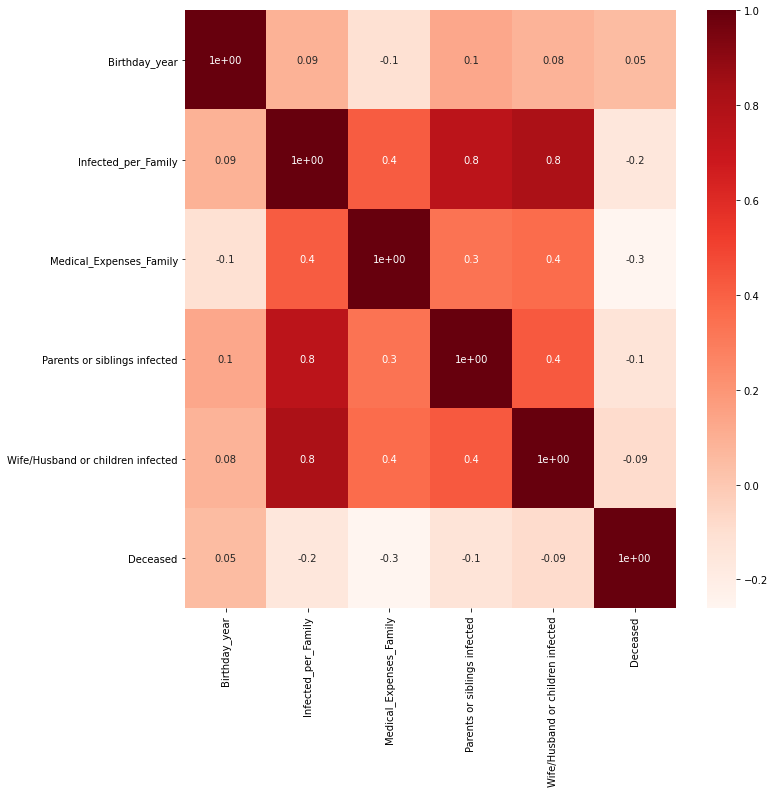

In [153]:
df_kendall = df[['Birthday_year', 'Infected_per_Family', 'Medical_Expenses_Family', 'Parents or siblings infected', 'Wife/Husband or children infected', 'Deceased']]

# create the correlation matrix (default to pearson)
corr_matrix = df_kendall.corr(method = 'kendall')

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(data = corr_matrix, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show()


We don't have any feature well correlated with the target. We cannot take a conclusion about which feature to choose.

In [184]:
from scipy.stats import kendalltau

variables = list(df_numerical.columns)

In [185]:
for var in variables:
    X = df_numerical[var].to_numpy()
    y = target.to_numpy()

    # calculate kendall's correlation
    tau, p = kendalltau(X, y)

    print('Kendall correlation coefficient: %.3f' % tau)
    
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p = %.3f' % p)
    else:
        print('Samples are correlated (reject H0) p = %.3f' % p)

Kendall correlation coefficient: 0.054
Samples are uncorrelated (fail to reject H0) p = 0.052
Kendall correlation coefficient: -0.153
Samples are correlated (reject H0) p = 0.000
Kendall correlation coefficient: -0.261
Samples are correlated (reject H0) p = 0.000
Kendall correlation coefficient: -0.130
Samples are correlated (reject H0) p = 0.000


#### 3. Chi-Squared

`INPUT VARIABLES`: Categorical <br>
`OUPUT VARIABLE`: Categorical <br>

In [234]:
from sklearn.feature_selection import chi2

In [235]:
chi_scores = chi2(df_categorical, target)
chi_scores

(array([ 29.463969  ,   2.04117937,  66.34428711, 164.33653021,
          0.26101974]),
 array([5.69659617e-08, 1.53090913e-01, 3.78654737e-16, 1.27715972e-37,
        6.09420446e-01]))

In [236]:
p_values = pd.Series(chi_scores[1],index = df_categorical.columns)
p_values.sort_values(ascending = False , inplace = True)

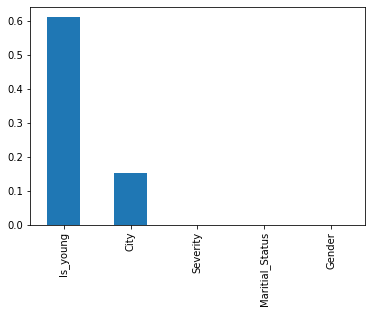

In [247]:
p_values.plot.bar()
#it says that is_young and city cannot be used to train the model.

In [238]:
X_categorical = df_categorical.to_numpy()

In [239]:
model = SelectKBest(chi2, k = 4) 
best = model.fit_transform(X_categorical, y_target) 

In [240]:
scores = model.scores_
scores

array([ 29.463969  ,   2.04117937,  66.34428711, 164.33653021,
         0.26101974])

<BarContainer object of 5 artists>

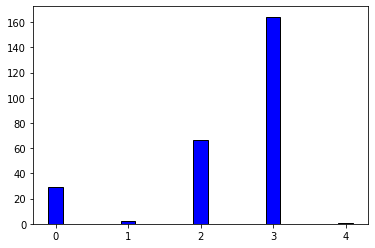

In [248]:
X_indices = np.arange(X_categorical.shape[-1])

plt.bar(X_indices, scores, width = .2, color = 'blue', edgecolor = 'black')

In [244]:
#no of features
nof_list=np.arange(1, 5) 

high_score=0

#Variable to store the optimum features
nof=0           

score_list =[]

models = [LogisticRegression(), MultinomialNB(), DecisionTreeClassifier()]

m = []

for n in range(len(nof_list)):
    for model in models:
    
        X_train, X_test, y_train, y_test = train_test_split(X_categorical,y_target, test_size = 0.3, random_state = 0)
        
        rfe = RFE(model,nof_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe, y_train)


        score = model.score(X_test_rfe, y_test)
        print(score)
        score_list.append(score)
        m.append(model)

        if(score > high_score):
            high_score = score
            nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print("Using: put decision tree")

0.7811320754716982
0.5735849056603773
0.7811320754716982
0.7811320754716982
0.5735849056603773
0.7660377358490567
0.7811320754716982
0.7773584905660378
0.7811320754716982
0.7622641509433963
0.7773584905660378
0.7811320754716982
Optimum number of features: 1
Score with 1 features: 0.781132
Using: put decision tree


In [252]:
lr = LogisticRegression()

rfe = RFE(lr, 3)
model = rfe.fit(X_categorical, y_target)
print("Num Features: %s" % (model.n_features_))
print("Selected Features: %s" % (model.support_))
print("Feature Ranking: %s" % (model.ranking_))
#Gender, severity and is_young 

Num Features: 3
Selected Features: [ True False False  True  True]
Feature Ranking: [1 3 2 1 1]


#### 4. Mutual Information

`INPUT VARIABLES`: Categorical <br>
`OUPUT VARIABLE`: Categorical <br>

In [271]:
from sklearn.feature_selection import mutual_info_classif

In [286]:
model = mutual_info_classif(X_categorical, y_target, discrete_features = True, random_state = 5)

In [287]:
model

array([0.05668076, 0.01402987, 0.07112326, 0.14830229, 0.00015585])